## FEATURE EXTRACTION USING AUTOENCODER

### UNSUPERVISED NEURAL NETWORK
input -> encoder (It learns how to efficiently compress and encode the data) -> "code" ->  decoder (It learns how to reconstructs the data representation) -> output (which is almost same as input image / both have same size)

to remove unnecessary details to reduce dimension space & to learn relevant features of image

![alt text](autoencoders.png "Title")

![alt text](encoderpipeline.png "Title")

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import cifar10
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization,Dropout
from keras.models import Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [2]:
classLabel = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [3]:
# since every value in image is ranging from 0 to 255, need to normalize the data to uniform range of 0-1 , diving by 255
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train = X_train/255
X_test = X_test/255

In [4]:

checkpointer = ModelCheckpoint("save/autoencoder.hdf5", verbose=0, save_best_only=True) # save best model
earlyStop = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
# convulational layers
# input = Input(shape=(32,32,3))   # 32,32,3

# # encoder
# x = Conv2D(64,(3,3),activation="relu",padding="same") (input)  
# x = MaxPooling2D((2,2))(x)  # reduces dimension / downsampling  

# x = Conv2D(32,(3,3),activation="relu",padding="same") (x)   
# x = MaxPooling2D((2,2))(x)

# x = Conv2D(16,(3,3),activation="relu",padding="same") (x)
# # x = MaxPooling2D((2,2))(x)

# x = Conv2D(8,(3,3),activation="relu",padding="same") (x)  # 8 x 8
# encoded = MaxPooling2D((2,2),padding="same",name="encoded_layer")(x)  # bottleneck


# # decoder
# x = Conv2D(8,(3,3),activation="relu",padding="same") (encoded)
# x = UpSampling2D((2,2))(x)

# x = Conv2D(16,(3,3),activation="relu",padding="same") (x)
# x = UpSampling2D((2,2))(x)

# x = Conv2D(32,(3,3),activation="relu",padding="same") (x)
# x = UpSampling2D((2,2))(x)

# reconstruct = Conv2D(64,(3,3),activation="relu",padding="same") (x)

# decoded = Conv2D(3,(3,3),padding="same") (reconstruct)

# autoencoder = Model(input,decoded)
# autoencoder.compile(optimizer="adam",loss="mse",metrics=["accuracy"])
# autoencoder.summary()

input_image = Input(shape=(32,32,3))

# Encoder
x = Conv2D(256, (3, 3), activation='relu', padding='same')(input_image)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same', name='encoded_layer')(x)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), padding='same')(x)

autoencoder = Model(input_image, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse',metrics=["accuracy"])
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       295040    
                                                                 
 encoded_layer (MaxPooling2D  (None, 8, 8, 128)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584

In [5]:
history = autoencoder.fit(X_train,X_train, validation_split=0.2, callbacks=[earlyStop,checkpointer],verbose=1,epochs=50, batch_size=256, shuffle=True)

Epoch 1/50
157/157 [==============================] - 362s 2s/step - loss: 0.0457 - accuracy: 0.5315 - val_loss: 0.0086 - val_accuracy: 0.6613
Epoch 2/50
157/157 [==============================] - 290s 2s/step - loss: 0.0069 - accuracy: 0.7255 - val_loss: 0.0065 - val_accuracy: 0.7792
Epoch 3/50
157/157 [==============================] - 286s 2s/step - loss: 0.0052 - accuracy: 0.7714 - val_loss: 0.0047 - val_accuracy: 0.7618
Epoch 4/50
157/157 [==============================] - 288s 2s/step - loss: 0.0046 - accuracy: 0.7788 - val_loss: 0.0040 - val_accuracy: 0.7885
Epoch 5/50
157/157 [==============================] - 288s 2s/step - loss: 0.0039 - accuracy: 0.7960 - val_loss: 0.0036 - val_accuracy: 0.8036
Epoch 6/50
157/157 [==============================] - 269s 2s/step - loss: 0.0036 - accuracy: 0.7986 - val_loss: 0.0033 - val_accuracy: 0.8097
Epoch 7/50
157/157 [==============================] - 270s 2s/step - loss: 0.0034 - accuracy: 0.8027 - val_loss: 0.0031 - val_accuracy: 0.7876

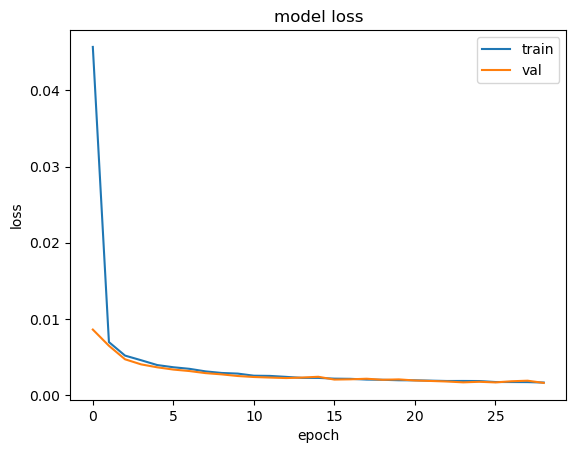

In [6]:
# plot summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [7]:
model = load_model("save/autoencoder.hdf5")
encoder = Model(inputs=model.input,outputs=model.get_layer('encoded_layer').output)

encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       295040    
                                                                 
 encoded_layer (MaxPooling2D  (None, 8, 8, 128)        0         
 )                                                               
                                                                 
Total params: 302,208
Trainable params: 302,208
Non-trainab

In [8]:
new_X_train = encoder.predict(X_train)
new_X_test = encoder.predict(X_test)

313/313 [==============================] - 6s 20ms/step


In [9]:
print(new_X_train.shape,new_X_test.shape)

(50000, 8, 8, 128) (10000, 8, 8, 128)


In [10]:
X_train1 = new_X_train.reshape((len(X_train),-1))
print(X_train1.shape)
X_test1 = new_X_test.reshape((len(X_test),-1))
print(X_test1.shape)

(50000, 8192)
(10000, 8192)


In [11]:
y_train1 = y_train.flatten()
print(y_train1.shape)
y_test1 = y_test.flatten()
print(y_test1.shape)

(50000,)
(10000,)


In [12]:
from sklearn.svm import SVC
import time

In [13]:
start = time.time()

svc_enc = SVC(kernel="rbf")
svc_enc.fit(X_train1,y_train1)

end = time.time()
print("Time Taken (SVM using Autoencoder) :",(end-start)/60,"minutes")

Time Taken (SVM using Autoencoder) : 270.35214407444 minutes


In [ ]:
with open("svc_en.pkl","wb") as f:
    pickle.dump(svc_enc,f)

In [14]:
svc_pred = svc_enc.predict(X_test1)
acc20 = accuracy_score(svc_pred,y_test1)
print("Accuracy Score (Support Vector Machines using Autoencoder) :",accuracy_score(svc_pred,y_test1))
print("Confusion matrix (Support Vector Machines using Autoencoder)\n",confusion_matrix(svc_pred,y_test1))
print("Classification Report (Support Vector Machines using Autoencoder)\n",classification_report(svc_pred,y_test1))

Accuracy Score (Support Vector Machines using Autoencoder) : 0.6229
Confusion matrix (Support Vector Machines using Autoencoder)
 [[664  38  89  25  29  16  11  24  76  46]
 [ 27 739  14  23   7   6   9   5  56 123]
 [ 58  13 472  92 105  83  47  31  21  12]
 [ 27  14  84 478  80 204  70  77  16  22]
 [ 11   5 117  70 537  74  62  79   7   8]
 [ 13   5  65 142  37 488  21  63  11  10]
 [ 19  14  81  94 110  45 745  29   8  19]
 [  5   9  42  34  72  59  12 649   7  22]
 [129  40  21  14  19  14   8   5 756  37]
 [ 47 123  15  28   4  11  15  38  42 701]]
Classification Report (Support Vector Machines using Autoencoder)
               precision    recall  f1-score   support

           0       0.66      0.65      0.66      1018
           1       0.74      0.73      0.74      1009
           2       0.47      0.51      0.49       934
           3       0.48      0.45      0.46      1072
           4       0.54      0.55      0.55       970
           5       0.49      0.57      0.53    